# German Traffic Sign Prediction Challenge

## 1.0 Defining the question

### Specifying the Question

Develop a deep learning algorithm that will train on German traffic sign images and then classify the unlabeled traffic signs.

Classifiers to use are:
1. Artificial Neural Networks

### Metric for success
-  Accuracy score

### Understanding the context

The German Traffic Sign Benchmark is a multi-class, single-image classification challenge held at the International Joint Conference on Neural Networks (IJCNN) 2011.
The dataset consists of 39,209 32×32 px color images that are supposed to use for training, and 12,630 images for testing. Each image is a photo of a traffic sign belonging to one of 43 classes, e.g. traffic sign types.


http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf

### Recording the experimental design

CRISP- DM methodology will be applied. Below steps will be undertaken to create the classifer.

- Business understanding - understanding the background about titanic
- Data understanding 
- Exploratory data analysis
- Feature engineering
- Data modelling
- Model interpretation

### Data relevance

...

## 2.0 Libraries Importation and Data Importation

#### Libraries importation and applying notebook wide settings

In [2]:
## Import Libraries
# Show all values in a cell and not last one only. 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Hide warnings to keep notebook tidy
# import warnings
# warnings.filterwarnings("ignore")

#Data Manipulation Libraries
import pandas as pd
import numpy as np
import random
#Libraries to read images
import os

#Import python imaging library for image manipulation.
from skimage import io,segmentation as seg
from PIL import Image

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

## TensorFlow and keras
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

#Accuracy metrics
from sklearn.metrics import accuracy_score


In [3]:
# Increase rows and columns visible on the notebook
pd.set_option('display.max_rows', 5000)
pd.set_option('display.max_columns', 50)

#Create class for colours
class color:
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   END = '\033[0m'

### Import CSV files

In [4]:
# Train test and  meta datasets
df_train = pd.read_csv('../input/gtsrb-german-traffic-sign/Test.csv')
df_test = pd.read_csv('../input/gtsrb-german-traffic-sign/Test.csv')
df_meta = pd.read_csv('../input/gtsrb-german-traffic-sign/Meta.csv')

## 2.0 Data Exploration

#### Preview sample records

Let's explore the files by visualizing sample data to understand the data contained in the 3 CSVs. Will crosscheck the column names and their descriptions against the documentation on kaggle

In [5]:
df_train.sample(4)
df_test.sample(4)

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
9378,33,32,6,5,27,26,9,Test/09378.png
1321,82,82,7,8,75,75,9,Test/01321.png
6074,53,49,5,5,47,43,13,Test/06074.png
1394,44,43,6,5,39,38,2,Test/01394.png


,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
9300,64,68,5,7,59,62,25,Test/09300.png
10564,60,69,5,6,55,63,39,Test/10564.png
3131,109,112,9,9,100,103,14,Test/03131.png
5845,36,36,6,6,31,31,3,Test/05845.png


### Observations
Train and test have the same columns which are:
    
    Width  - Width of the image
    
    Height - Height of the image
    
    Roi.X1 - Region of interest X1: Upper left X coordinate of sign on image
    
    Roi.Y1 - Region of interest Y1: Upper left Y coordinate of sign on image
    
    Roi.X2 - Region of interest X2: Lower right X coordinate of sign on image
    
    Roi.Y2 - Region of interest Y2: Lower right Y coordinate of sign on image
    
    ClassId- Class of image e.g 20 km speed limit.
    
    Path   - Path of image on filesystem
    
    Notes:Point of Interest
It is sometimes of interest to process a single subregion of an image, leaving other regions unchanged. This is commonly referred to as region-of-interest (ROI) processing. Image sub regions may be conveniently specified by using Mathematica Graphics primitives, such as Point, Line, Circle, Polygon, or simply as a list of vertex positions.

A region of interest (ROI) is a portion of an image that you want to filter or perform some other operation on. You define an ROI by creating a binary mask, which is a binary image that is the same size as the image you want to process with pixels that define the ROI set to 1 and all other pixels set to 0.

**Metadata File exploration**

In [6]:
df_meta.sample(4)

,Path,ClassId,ShapeId,ColorId,SignId
11,Meta/18.png,18,0,0,1.39
36,Meta/41.png,41,1,3,3.26
14,Meta/20.png,20,0,0,1.1
7,Meta/14.png,14,3,0,2.2


Meta File Description

The file provides classes meta information about classes provided by this dataset.

    Path - Path to image
    ClassId - Image class ID
    ShapeId - Shape of sign (0-triangle, 1-circle, 2-diamond, 3-hexagon, 4-inverse triangle)
    ColorId - Color of sign (0-red, 1-blue, 2-yellow, 3-white)
    SignId  - Sign ID (by Ukrainian Traffic Rule)

**Shape of the dataset**

In [7]:
# Columns and rows
print("Train: ",df_train.shape)
print("Test: ",df_test.shape)
print("Meta: ",df_meta.shape)

Train:  (12630, 8)
Test:  (12630, 8)
Meta:  (43, 5)


Train dataset has 39,209 rows and 8 columns

Test dataset has 12630 rows and 8 columns 

Meta has 43 rows and 5 columns

**Data Types**

In [8]:
# Check the data types of the columns
print(color.BLUE,"Train Dataset",color.END)
df_train.info()
print(color.BLUE,"Test dataset",color.END)
df_test.info()
print(color.BLUE,"Meta dataset",color.END)
df_meta.info()

 Train Dataset 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12630 entries, 0 to 12629
Data columns (total 8 columns):
Width      12630 non-null int64
Height     12630 non-null int64
Roi.X1     12630 non-null int64
Roi.Y1     12630 non-null int64
Roi.X2     12630 non-null int64
Roi.Y2     12630 non-null int64
ClassId    12630 non-null int64
Path       12630 non-null object
dtypes: int64(7), object(1)
memory usage: 789.5+ KB
 Test dataset 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12630 entries, 0 to 12629
Data columns (total 8 columns):
Width      12630 non-null int64
Height     12630 non-null int64
Roi.X1     12630 non-null int64
Roi.Y1     12630 non-null int64
Roi.X2     12630 non-null int64
Roi.Y2     12630 non-null int64
ClassId    12630 non-null int64
Path       12630 non-null object
dtypes: int64(7), object(1)
memory usage: 789.5+ KB
 Meta dataset 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 5 columns):
Path       43 non-

All columns are numerical except path which is an object. It stores the path to the image directory on the filesystem 

#### Statistical Measures

In [9]:
#Check statistical summary of the dataset
print(color.BLUE,"Train Dataset",color.END)
df_train.describe()
print(color.BLUE,"Test Dataset",color.END)
df_test.describe()
print(color.BLUE,"Meta Dataset",color.END)
df_test.describe()

 Train Dataset 


,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId
count,12630.000000,12630.000000,12630.000000,12630.000000,12630.000000,12630.000000,12630.000000
mean,50.507759,50.364450,5.998021,5.982423,44.864450,44.758116,15.551069
std,25.088483,23.698908,1.543954,1.427424,23.776102,22.494697,11.947123
min,25.000000,25.000000,1.000000,5.000000,20.000000,20.000000,0.000000
25%,34.000000,35.000000,5.000000,5.000000,29.000000,29.000000,5.000000
50%,43.000000,43.000000,6.000000,6.000000,38.000000,38.000000,12.000000
75%,58.000000,57.000000,6.000000,6.000000,53.000000,52.000000,25.000000
max,266.000000,232.000000,23.000000,19.000000,244.000000,212.000000,42.000000


 Test Dataset 


,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId
count,12630.000000,12630.000000,12630.000000,12630.000000,12630.000000,12630.000000,12630.000000
mean,50.507759,50.364450,5.998021,5.982423,44.864450,44.758116,15.551069
std,25.088483,23.698908,1.543954,1.427424,23.776102,22.494697,11.947123
min,25.000000,25.000000,1.000000,5.000000,20.000000,20.000000,0.000000
25%,34.000000,35.000000,5.000000,5.000000,29.000000,29.000000,5.000000
50%,43.000000,43.000000,6.000000,6.000000,38.000000,38.000000,12.000000
75%,58.000000,57.000000,6.000000,6.000000,53.000000,52.000000,25.000000
max,266.000000,232.000000,23.000000,19.000000,244.000000,212.000000,42.000000


 Meta Dataset 


,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId
count,12630.000000,12630.000000,12630.000000,12630.000000,12630.000000,12630.000000,12630.000000
mean,50.507759,50.364450,5.998021,5.982423,44.864450,44.758116,15.551069
std,25.088483,23.698908,1.543954,1.427424,23.776102,22.494697,11.947123
min,25.000000,25.000000,1.000000,5.000000,20.000000,20.000000,0.000000
25%,34.000000,35.000000,5.000000,5.000000,29.000000,29.000000,5.000000
50%,43.000000,43.000000,6.000000,6.000000,38.000000,38.000000,12.000000
75%,58.000000,57.000000,6.000000,6.000000,53.000000,52.000000,25.000000
max,266.000000,232.000000,23.000000,19.000000,244.000000,212.000000,42.000000


There are 42 image classes

#### Check duplicates

In [10]:
print(color.BLUE,"Train Dataset null values: ",color.END, df_train.duplicated().sum())
print(color.BLUE,"Test Dataset null values: ",color.END, df_test.duplicated().sum())
print(color.BLUE,"Meta Dataset null values: ",color.END, df_meta.duplicated().sum())

 Train Dataset null values:   0
 Test Dataset null values:   0
 Meta Dataset null values:   0


There are no noted duplicates

**Display Distribution of Images Count per class for both Test and Train**

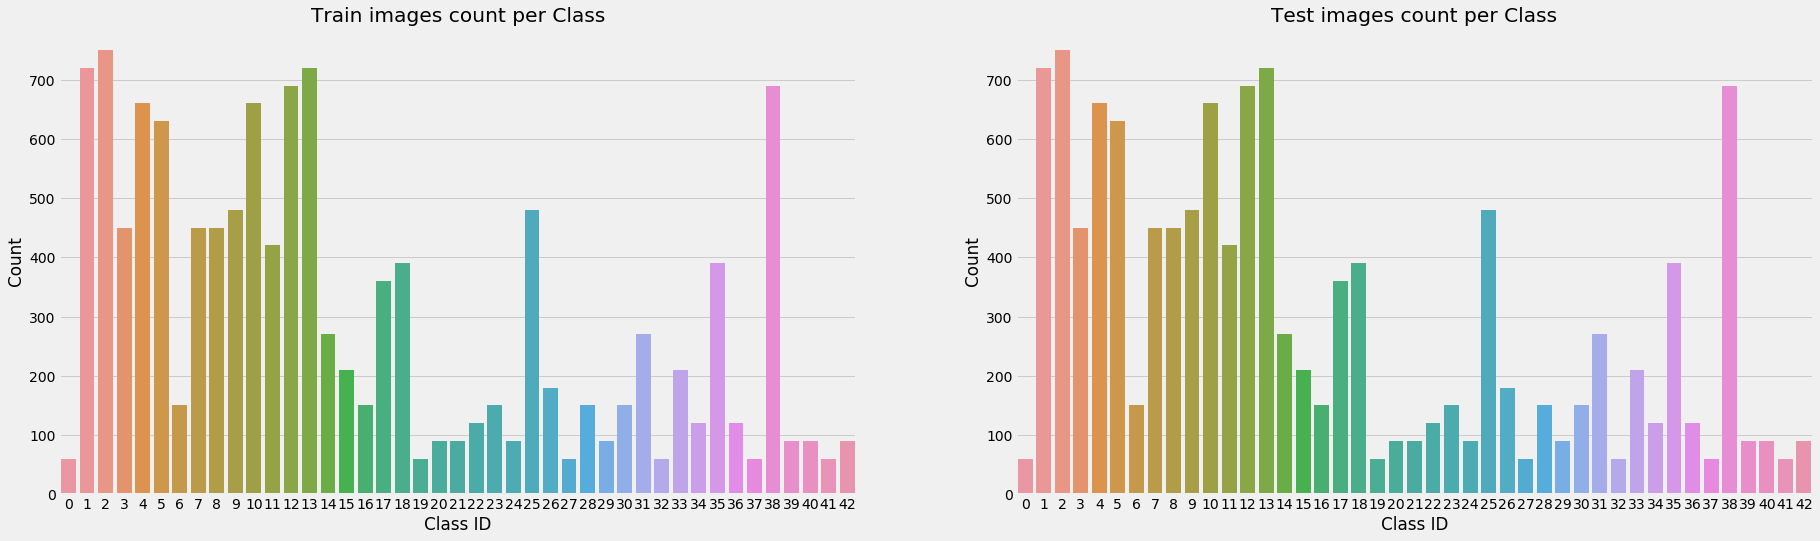

In [11]:
plt.style.use('fivethirtyeight')

#Create two suplots
fig, ax = plt.subplots(1, 2, figsize=(28, 8))

#Plot the histogram
sns.countplot(df_train.ClassId, ax=ax[0])
sns.countplot(df_test.ClassId, ax=ax[1])

#Set X,y labels and Title
ax[0].set_title('Train images count per Class')
ax[0].set_xlabel('Class')
ax[0].set_ylabel('Count')
ax[0].set_xlabel('Class ID');

ax[1].set_title('Test images count per Class')
ax[1].set_xlabel('Class')
ax[1].set_ylabel('Count')
ax[1].set_xlabel('Class ID');

## 3.0 Images Importation and exploration

Import train Images. To use os package to read te 43 subdirectory directory i.e 0 to 42 and image names in the files

For image manipulation after reading from file system, Pillo or Open CV libraries can be used. PIL is used in below. Criteria used to select the image manipulation library is first understood, first applied.

In [12]:
def load_train_images(path,classes_count,height, width):
    """
    Function to load images from Kaggle data repository.
    Function argument: path (str) -- path to images
    Returns:
    images (list) -- list with images;
    labels (list) -- list with labels;
    """
    images = []
    labels = []
    classes = [i for i in range(classes_count)] # Code change note: Can also apply classes count directly in for loop
    
    # Loop from first class to last class
    for new_class in classes:
        #Append the path provided as an argument plus the new_class value which is 0 to 42 which are the sub-directories under train directory
        new_path = path + str(new_class) + "/"
        
        #Retrieve the filenames from the file path
        file_names = [os.path.join(new_path, f)
                     for f in os.listdir(new_path)]
        
        #Append the images and labels to the list.
        for file in file_names:
#             images.append(io.imread(file))
            image=io.imread(file)
            
            #image_shape = image.shape View height, width of various images. Images have diffent length and height.
            
            # Creates an image memory using the Image library of PIL/Pillow library
            image_from_array = Image.fromarray(image, 'RGB')
            #Resize image
            size_image = image_from_array.resize((height, width))
            #Append image into list
            images.append(np.array(size_image))
            #Label for each image. Will have values 1 to 42
            labels.append(new_class)
            
    return images, labels

## Invoke the function

#Image resize parameters
height = 30
width = 30

#Get number of classes
classes_count = df_train['ClassId'].nunique()

train_images, train_labels = load_train_images("../input/gtsrb-german-traffic-sign/train/",classes_count,height,width)

In [13]:
#Size and dimension of output image and labels
train_images = np.array(train_images)
train_labels = np.array(train_labels)
print("Shape of train images is " + str(train_images.shape))
print("Shape of train labels is " + str(train_labels.shape))

Shape of train images is (39209, 30, 30, 3)
Shape of train labels is (39209,)


The train_image array has 4 dimensions i.e Image count(39209), height, width(both 30 as per resize) and channel (3 is for RGB, 1 is for grayscale)

0

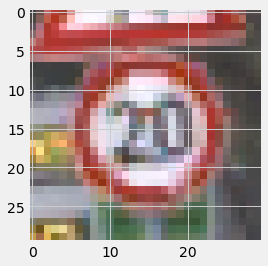

In [14]:
#View Sample Image
plt.imshow(train_images[0])
train_labels[0]

**Load test images**

In [31]:
#Function to load test images

def load_test_images(paths,height, width):
    """
    Arguments:
    paths (str) -- paths to images;
    
    Returns:
    images (list) - list with images;    
     """    
    images = []
    for f in paths:
        image = io.imread('../input/gtsrb-german-traffic-sign/test/' + f.replace('Test/', ''))
#         images.append(image)
        image_from_array = Image.fromarray(image, 'RGB')
        #Resize image
        size_image = image_from_array.resize((height, width))
        #Append image into list
        images.append(np.array(size_image))
    return images

#Invoke function
#Image resize parameters
height = 30
width = 30

test_images = load_test_images(paths,height, width)

In [32]:
#Size and dimension of output image and labels
test_images = np.array(test_images)
test_labels = np.array(test_labels)
print("Shape of test images is " + str(test_images.shape))
print("Shape of test labels is " + str(test_labels.shape))


Shape of test images is (12630, 30, 30, 3)
Shape of test labels is (12630,)


12630 images loaded of dimension 1.

**Visualize some class images**

Train images, sizes and cass labels


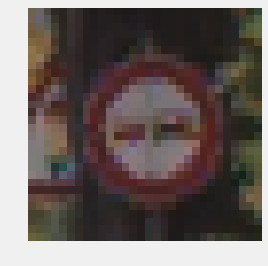

Size of this image is (30, 30, 3)
Class of the image is 9


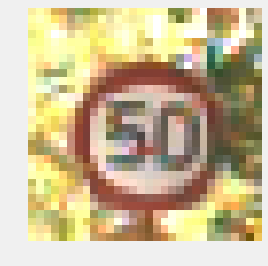

Size of this image is (30, 30, 3)
Class of the image is 2


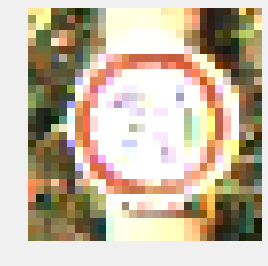

Size of this image is (30, 30, 3)
Class of the image is 4


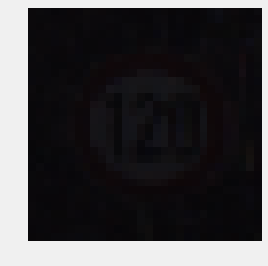

Size of this image is (30, 30, 3)
Class of the image is 8


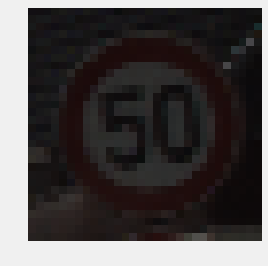

Size of this image is (30, 30, 3)
Class of the image is 2


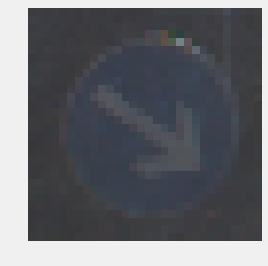

Size of this image is (30, 30, 3)
Class of the image is 38


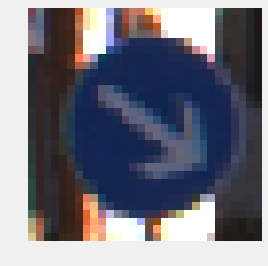

Size of this image is (30, 30, 3)
Class of the image is 38


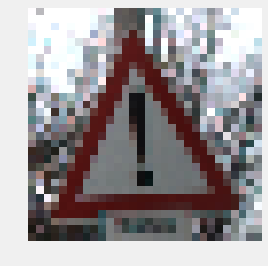

Size of this image is (30, 30, 3)
Class of the image is 18


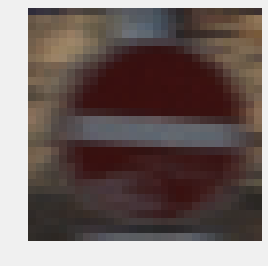

Size of this image is (30, 30, 3)
Class of the image is 17


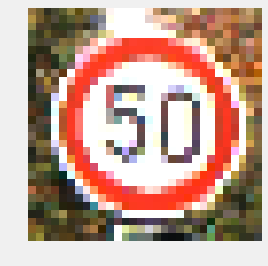

Size of this image is (30, 30, 3)
Class of the image is 2


In [17]:
def show_train_images(images, labels, images_count):
    """
    Arguments:
    images (np.array) -- list with images;
    labels (np.array) -- list with labels
    amount (int) -- amount of images to show.    
    """
    
    for i in range(images_count):
        index = int(random.random() * len(images))
        plt.axis('off')
        plt.imshow(images[index])
        plt.show()
        
        print("Size of this image is " + str(images[index].shape))
        print("Class of the image is " + str(labels[index]))

#Execute the function
print("Train images, sizes and cass labels")
show_train_images(train_images, train_labels, 10)

## Modelling

Model used: Convolutional Neural Network
Technologies : 

Tensor flow - Modelling
Keras - High level API to tensor flow

#### Spliting the images into train and validation sets. 

Validation set to be 20% of all train images. Reason for splitting is to be able to have validation set with labels. The test dataset provided does not have labels hence is not the best check for bias/variance check.

In [18]:
#Split test and validation.

(X_train,X_val) = train_images[(int)(0.2*len(train_labels)):],train_images[:(int)(0.2*len(train_labels))]
print("X Train count is ",len(X_train), " and X validation count ", len(X_val))


#Typically, RGB values are encoded as 8-bit integers, which range from 0 to 255. It's an industry standard to think of 0.0f as black and 1.0f as white (max brightness). 
#To convert [0, 255] to [0.0f, 1.0f], divide by 255.0f. This is done below to our train and validation image array

X_train = X_train.astype('float32')/255 
X_val = X_val.astype('float32')/255

#Split the labels using same percentages
(y_train,y_val)=train_labels[(int)(0.2*len(train_labels)):],train_labels[:(int)(0.2*len(train_labels))]

print("Y Train count is ",len(y_train), " and y validation count ", len(y_val))

# Future code Change NoteTo simplify as below
# X_train,X_valid,Y_train,Y_valid = train_test_split(x_train,y_train,test_size = 0.3,random_state=0)
# print("Train :", X_train.shape)
# print("Valid :", X_valid.shape)

X Train count is  31368  and X validation count  7841
Y Train count is  31368  and y validation count  7841


In [19]:
#Convert the predicted labels to categorical type
from keras.utils import to_categorical
y_train = to_categorical(y_train, 43)
y_val = to_categorical(y_val, 43)

Using TensorFlow backend.


In [21]:
#Define the CNN Model

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        2432      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 64)         

In [22]:

#Compilation of the model
model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)

In [23]:
#using ten epochs for the training and saving the accuracy for each epoch
epochs = 10
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs,validation_data=(X_val, y_val))


Train on 31368 samples, validate on 7841 samples
Epoch 1/10
31368/31368 [==============================] - 10s 332us/step - loss: 0.9391 - accuracy: 0.7393 - val_loss: 21.9608 - val_accuracy: 0.1453
Epoch 2/10
31368/31368 [==============================] - 6s 200us/step - loss: 0.1895 - accuracy: 0.9412 - val_loss: 22.0721 - val_accuracy: 0.1998
Epoch 3/10
31368/31368 [==============================] - 7s 208us/step - loss: 0.1177 - accuracy: 0.9640 - val_loss: 19.1410 - val_accuracy: 0.1986
Epoch 4/10
31368/31368 [==============================] - 7s 225us/step - loss: 0.0931 - accuracy: 0.9718 - val_loss: 27.9866 - val_accuracy: 0.2016
Epoch 5/10
31368/31368 [==============================] - 7s 219us/step - loss: 0.0711 - accuracy: 0.9770 - val_loss: 24.0056 - val_accuracy: 0.2140
Epoch 6/10
31368/31368 [==============================] - 7s 208us/step - loss: 0.0727 - accuracy: 0.9774 - val_loss: 25.3186 - val_accuracy: 0.2171
Epoch 7/10
31368/31368 [==============================] 

In [24]:
#Accuracy List
history.history['accuracy']

[0.73932034,
 0.9411502,
 0.963976,
 0.9718184,
 0.9770148,
 0.9773655,
 0.98001146,
 0.9826575,
 0.98457026,
 0.9863874]

Plot the accuracy and Loss Metrics

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Accuracy')

Text(0.5, 0, 'epochs')

Text(0, 0.5, 'accuracy')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Loss')

Text(0.5, 0, 'epochs')

Text(0, 0.5, 'loss')

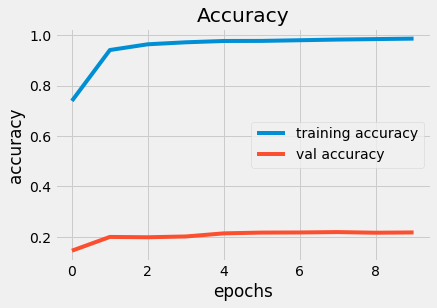

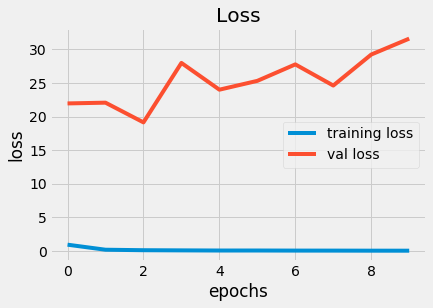

In [26]:
#Display of the accuracy and the loss values
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

### Apply the Model Against the Test Data

In [33]:
## Predicting Test data 

# Get the test data paths and class id from test dataframe
test_labels = df_test['ClassId'].values
paths = df_test['Path'].values

test_images = test_images.astype('float32')/255  

y_pred = model.predict_classes(test_images)

In [35]:
# Get accuracy
accuracy_score(test_labels, y_pred)

0.8096595407759303

When the model was subjected against the test data, there was an accuracy of 80.9% 